In [1]:
import pandas as pd
import quantecon as qe
import warnings
warnings.filterwarnings('ignore')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
fp = "../data/regimed_coffee_prices.csv"
df = pd.read_csv(fp)
select_r8 = (df.regime == "R-8")
dfr8 = df[select_r8].copy().reset_index(drop=True)
del df

In [3]:
LEARN_RNG = 40

In [4]:
dfr8.shape[0]

47

In [5]:
from matplotlib import pyplot as plt
dflearn = dfr8.iloc[:LEARN_RNG, :].reset_index()

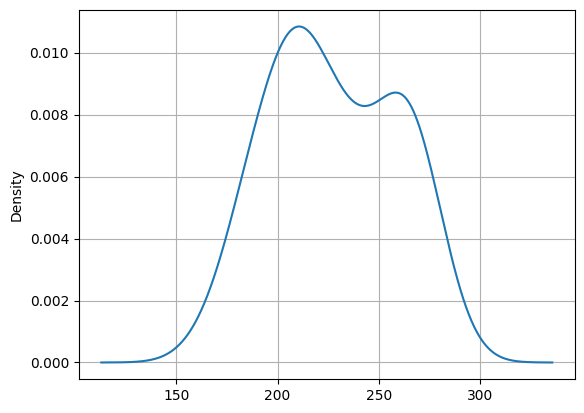

In [6]:
dflearn["cents_per_lb"].plot.kde()
plt.grid(True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm
X = dflearn["cents_per_lb"].values
X = X.reshape((X.shape[0], 1))

In [8]:
X.shape

(40, 1)

In [9]:
comp_range = [ 2,3]

In [10]:
comp_range

[2, 3]

In [11]:
np.random.randint(500)

56

In [12]:
scores = list()
models = list()
bic = list()
np.random.seed(10)
for n_components in comp_range:
    for idx in range(10):
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components,
                                covariance_type='full',
                                random_state=np.random.randint(10,500))
        model.fit(X)  # 50/50 
        models.append(model)
        scores.append(model.score(X))
        bic.append(model.bic(X))
        print(f'Converged: {model.monitor_.converged}'
              f'\tScore: {scores[-1]}')

# get the best model
model = models[np.argmin(bic)]
n_states = model.n_components
print(f'The best model had a score of {max(scores)} and {n_states} '
      'states')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)

Converged: True	Score: -193.01424017511735
Converged: True	Score: -173.4905746732474
Converged: True	Score: -173.50308099381377
Converged: True	Score: -173.4440605514749
Converged: True	Score: -193.00533548374705
Converged: True	Score: -173.2950245063382
Converged: True	Score: -192.69477463018066
Converged: True	Score: -173.49555242391432
Converged: True	Score: -193.02331693449096
Converged: True	Score: -173.29226497857934
Converged: True	Score: -165.47664941343598
Converged: True	Score: -178.86754302496482
Converged: True	Score: -166.65183108643694
Converged: True	Score: -165.4549050271745
Converged: True	Score: -171.8040837555721
Converged: True	Score: -167.82937741455203
Converged: True	Score: -177.08936192571053
Converged: True	Score: -169.99930610147587
Converged: True	Score: -173.16803000558758
Converged: True	Score: -165.29478475018215
The best model had a score of -165.29478475018215 and 2 states


In [13]:
Xt = dfr8.loc[LEARN_RNG:, "cents_per_lb"].values
Xt = Xt.reshape((Xt.shape[0], 1))

In [14]:
model.predict(Xt)

array([0, 1, 1, 1, 0, 0, 0])

In [15]:
dflearn["cluster"] = model.predict(X)

In [16]:
dflearn.groupby("cluster").agg( size = pd.NamedAgg(column="cluster", aggfunc="size"),\
                         min_price = pd.NamedAgg(column="cents_per_lb", aggfunc="min"),\
                        max_price = pd.NamedAgg(column="cents_per_lb", aggfunc="max"),\
                        mean_price = pd.NamedAgg(column="cents_per_lb", aggfunc="mean"),\
                        std_dev_price =  pd.NamedAgg(column="cents_per_lb", aggfunc="std")).round(2)

,size,min_price,max_price,mean_price,std_dev_price
cluster,,,,,
0,27,168.65,241.07,209.79,19.25
1,13,248.40,279.83,264.17,8.50


In [17]:
model.covars_

array([[[355.45947763]],

       [[ 88.55697321]]])

In [18]:
model.means_

array([[209.41982256],
       [263.24063538]])

In [19]:
select_c0 = (dflearn.cluster == 0)
select_c1 = (dflearn.cluster == 1)

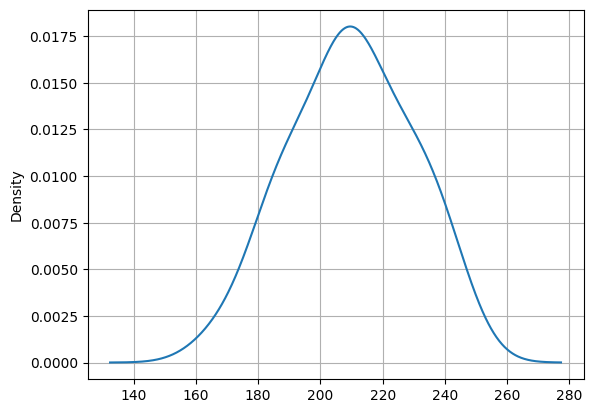

In [20]:
from matplotlib import pyplot as plt
dflearn[select_c0]["cents_per_lb"].plot.kde()
plt.grid(True)

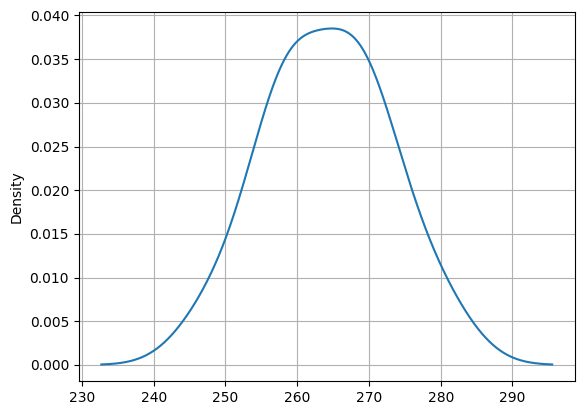

In [21]:
dflearn[select_c1]["cents_per_lb"].plot.kde()
plt.grid(True)